<a href="https://colab.research.google.com/github/GuilhermeRuy97/Machine-Learning-Base/blob/main/Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Text(0, 0.5, 'y')

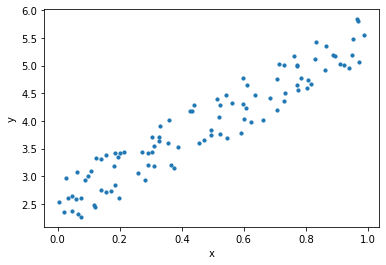

In [8]:
#gerando um data set aleatório
np.random.seed(42)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

#pontos dos dados
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

In [11]:
#sckit-learn implementation: https://scikit-learn.org/stable/

#Inicialização do modelo
regression_model = LinearRegression()
#Treinando o modelo
regression_model.fit(x, y) #lembrar-se de que neste exemplo, usa-se todo o conjunto e não um treino ou validação ou teste0
#Predict
y_predicted = regression_model.predict(x)

#Avaliação de modelo
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Slope: ', regression_model.coef_)
print('Intercept: ', regression_model.intercept_)
print('Root mean squared error: ', rmse) #melhor quanto mais próximo de 0
print('R2 score: ', r2)

Slope:  [[2.96646836]]
Intercept:  [2.51359766]
Root mean squared error:  0.08495655256593736
R2 score:  0.9007473284443555


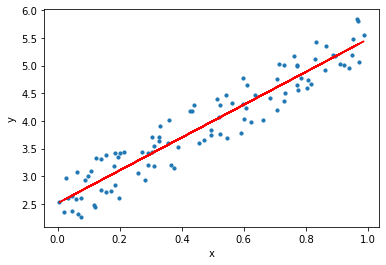

In [12]:
#plotando valores
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

#valores preditos
plt.plot(x, y_predicted, color = 'r')
plt.show()

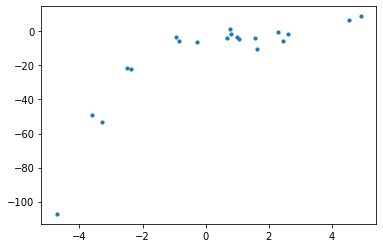

In [13]:
#Regressão polinomial

#gerando um data-set aleatório
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x **2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x, y, s=10)
plt.show()

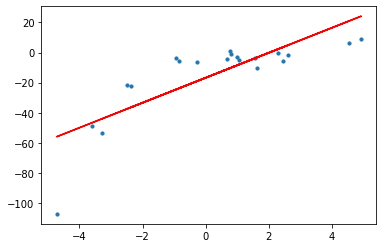

Slope:  [[2.96646836]]
Intercept:  [2.51359766]
Root mean squared error:  253.07217948430375
R2 score:  0.6386750054827146


In [14]:
#Transformando a data para incluir outro eixo
x = x[:, np.newaxis]
y = y[:, np.newaxis]

#sckit-learn implementation
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color = 'r')
plt.show()

#avaliação de modelo
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('Slope: ', regression_model.coef_)
print('Intercept: ', regression_model.intercept_)
print('Root mean squared error: ', rmse) #melhor quanto mais próximo de 0 // perceba o resultado
                                         #o que mostra como a regressão linear não é adequada
print('R2 score: ', r2)

10.120437473614711
0.8537647164420812


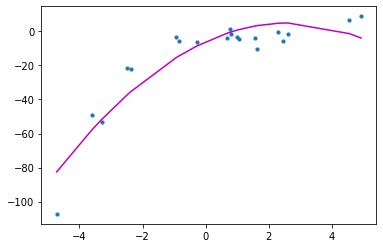

In [23]:
import operator
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x**2) + 0.5 * (x**3) + np.random.normal(-3, 3, 20)

x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=2) #degree pode ser alterado
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)

#Ordenando os valores de x antes de plotar
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()